In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
data = '/home/joe/data/covid19/summary'
data = '/run/user/1000/gvfs/smb-share:server=majesty.local,share=filesjoe/data/summary'
df = pd.read_csv(data)

df = df.astype({'country':'string','cases':'int32', 'deaths':'int32'})
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df = df.sort_values(by=['date'])
df = df.reset_index()
df = df.drop(['index'],axis=1)

In [3]:
df.head()

,date,country,cases,deaths
0,2020-01-27,china,2741,80
1,2020-01-28,china,4537,106
2,2020-01-29,china,5997,132
3,2020-01-30,china,7736,170
4,2020-01-31,china,9720,213


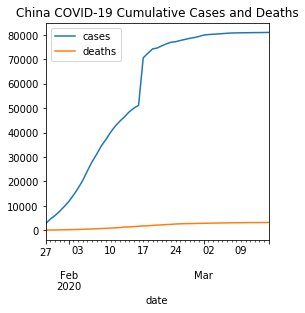

In [15]:
df.plot(x='date',y=['cases','deaths'],kind='line',
        figsize=(4,4),title="China COVID-19 Cumulative Cases and Deaths")


Text(0, 0.5, 'cumulative deaths')

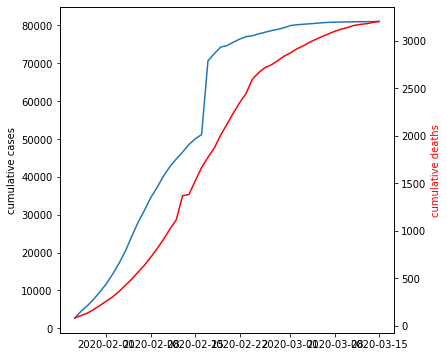

In [26]:
fig = plt.figure()
fig.set_size_inches(6,6)

ax1 = fig.add_subplot(111)
ax1.plot(df['date'],df['cases'])
ax1.set_ylabel('cumulative cases')

ax2 = ax1.twinx()
ax2.plot(df['date'],df['deaths'],'r-')
ax2.set_ylabel('cumulative deaths', color='r')

In [21]:
df.corr()

,cases,deaths
cases,1.000000,0.969542
deaths,0.969542,1.000000


In [23]:
df['mortality'] = df.apply(lambda row: row.deaths/row.cases, axis = 1) 

df.head()

,date,country,cases,deaths,mortality
0,2020-01-27,china,2741,80,0.029186
1,2020-01-28,china,4537,106,0.023363
2,2020-01-29,china,5997,132,0.022011
3,2020-01-30,china,7736,170,0.021975
4,2020-01-31,china,9720,213,0.021914


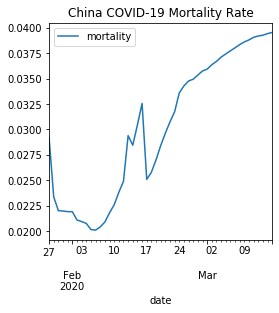

In [24]:
df.plot(x='date',y=['mortality'],kind='line',
        figsize=(4,4),title="China COVID-19 Mortality Rate")
